## BIOMEDICAL DATA SCIENCE HOMEWORK 2

# Importing Libraries

In [15]:
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import seaborn
import seaborn as sns  
# Import LabelEncoder  
from sklearn.preprocessing import LabelEncoder
# Import Train_test_split  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## 1. Load the dataset into google Colab notebook

#  Loading the dataset 


In [2]:
url = 'https://raw.githubusercontent.com/iknm/Data-scince/main/HW2data.csv'
HW2_data = pd.read_csv(url)# Dataset is now stored in a Pandas Dataframe
HW2_data = HW2_data.drop("name",axis=1) 
HW2_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


## 2 Why is cross-validation necessary when selecting an optimal k ?
Cross-validation use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.  Source: https://machinelearningmastery.com/k-fold-cross-validation/

Split the dataset for training 

In [3]:
X = HW2_data.iloc[:, :-1].values
y = HW2_data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)

In [4]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


KNN

In [5]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier())])

#  set parameter k as odd numbers from 5 to 15   
param_grid = [{'knn__n_neighbors': [5,7,9,11,13]}]
#  Using GridSearchCV to find the optimal k. 
gs= GridSearchCV(estimator=pipe_knn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

#  Fit grid serach model to training data 
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9145833333333332
{'knn__n_neighbors': 7}


In [6]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.87


K-fold cross-validation

In [7]:
scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.9375     0.9375     0.875      0.9375     0.875      0.9375
 0.93333333 0.73333333 0.73333333 1.        ]
CV accuracy: 0.890 +/- 0.085


In [8]:
clf_knn = gs.best_estimator_
# run the classifier on test data and get the output Y_pred 
Y_pred= clf_knn.predict(X_test)

## 3. learning curve Plot

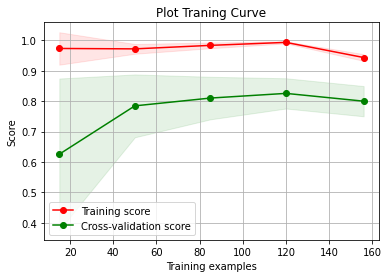

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

    #plot training curves on training data by calling the function 
plot_learning_curve(clf_knn, 'Plot Traning Curve', X, y)
plt.show()

## 4.Confusion matrix

In [10]:
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[ 6  4]
 [ 1 28]]


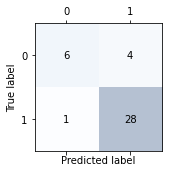

In [11]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

# Precision and recall (sensitivity)  of a classification model

In [12]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.875
Recall: 0.966
F1: 0.918
